# Evaluation of Task3 from statstical model for both baseline and enhanced baseline. Snippet to evaluate from transformer+tfidf model 

In [ ]:
import joblib
import pandas as pd
import scipy
from sklearn.metrics import classification_report


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
train_df = pd.read_csv("/content/drive/MyDrive/nlp-data/liwc_pos_dep_tr.csv")
test_df = pd.read_csv("/content/drive/MyDrive/nlp-data/liwc_pos_dep_eval.csv")
reddit_df = pd.read_csv("/content/drive/MyDrive/nlp-data/liwc_pos_dep_reddit.csv")


In [ ]:
labels2id = {alg:i for i, alg in enumerate(train_df["alg"].unique())}
labels2id

{'human': 0,
 'fair': 1,
 'grover': 2,
 'gpt2': 3,
 'gpt3': 4,
 'instructgpt': 5,
 'gpt': 6,
 'ctrl': 7,
 'pplm': 8,
 'xlnet': 9,
 'xlm': 10}

In [ ]:
id2labels = {v:k for k, v in labels2id.items()}
id2labels

{0: 'human',
 1: 'fair',
 2: 'grover',
 3: 'gpt2',
 4: 'gpt3',
 5: 'instructgpt',
 6: 'gpt',
 7: 'ctrl',
 8: 'pplm',
 9: 'xlnet',
 10: 'xlm'}

In [ ]:
def get_features_test(data, vectorizer=None, numerical_fields=None):
  if not vectorizer:
    raise Exception("Vectorizer need")
  
  tfidf = vectorizer.get("tfidf", {})
  count_vec = vectorizer.get("count", {})

  features = []
  if not numerical_fields:
    numerical_fields = []

  for ele in tfidf:
    features.append(ele[1].transform(data[ele[0]]))

  for ele in count_vec:
    features.append(ele[1].transform(data[ele[0]]))

  for field in numerical_fields:
    features.append(scipy.sparse.csr_matrix(data[field]).T)

  return scipy.sparse.hstack(features)

In [ ]:
def test_model(model, X, y, id2labels):
  predict = list(map(lambda x: id2labels[x], model.predict(X)))
  print(classification_report(predict, y))
  return predict, y


In [ ]:
import joblib

# trained only on generation text
vectorizer_generation = joblib.load("/content/drive/MyDrive/nlp-models/vectorizer_generation.pkl")
lsvc_generation = joblib.load("/content/drive/MyDrive/nlp-models/lsvc_generation.pkl")
rf_generation = joblib.load("/content/drive/MyDrive/nlp-models/rf_generation.pkl")
xgb_generation = joblib.load("/content/drive/MyDrive/nlp-models/xgb_generation.pkl")


# trained only on pos tags of the text
vectorizer_pos = joblib.load("/content/drive/MyDrive/nlp-models/vectorizer_pos.pkl")
lsvc_pos = joblib.load("/content/drive/MyDrive/nlp-models/lsvc_pos.pkl")
rf_pos = joblib.load("/content/drive/MyDrive/nlp-models/rf_pos.pkl")
xgb_pos = joblib.load("/content/drive/MyDrive/nlp-models/xgb_pos.pkl")


# trained on pos,dep tags and liwc like "semantic_coherence", "Analytic", "WPS", "article", "Period" of the text
vectorizer_pos_dep_liwc = joblib.load("/content/drive/MyDrive/nlp-models/vectorizer_pos_dep_liwc.pkl")
lsvc_pos_dep_liwc = joblib.load("/content/drive/MyDrive/nlp-models/lsvc_pos_dep_liwc.pkl")
rf_pos_dep_liwc = joblib.load("/content/drive/MyDrive/nlp-models/rf_pos_dep_liwc.pkl")
xgb_pos_dep_liwc = joblib.load("/content/drive/MyDrive/nlp-models/xgb_pos_dep_liwc.pkl")



In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
def return_cm(y_true, y_pred):
  cm = confusion_matrix(y_true, y_pred)
  classes = ["ctrl", "fair", "gpt", "gpt2", "gpt3", "grover", "human", "instructgpt", "pplm", "xlm", "xlnet"]
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
  plt.title('Confusion Matrix')
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)
  thresh = cm.max() / 2.
  for i, j in np.ndindex(cm.shape):
      plt.text(j, i, format(cm[i, j], 'd'),
              horizontalalignment="center",
              color="white" if cm[i, j] > thresh else "black")
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')
  plt.show()


## **On Generation Text**

----------------------Linear SVC---------------------------
              precision    recall  f1-score   support

        ctrl       1.00      0.96      0.98       110
        fair       0.47      0.45      0.46       111
         gpt       1.00      0.98      0.99       108
        gpt2       0.55      0.62      0.58        95
        gpt3       0.56      0.57      0.57       105
      grover       0.36      0.62      0.45        61
       human       0.81      0.77      0.79       222
 instructgpt       0.59      0.52      0.56       121
        pplm       0.68      0.57      0.62       127
         xlm       1.00      0.95      0.97       113
       xlnet       0.98      0.99      0.99       106

    accuracy                           0.73      1279
   macro avg       0.73      0.73      0.72      1279
weighted avg       0.75      0.73      0.74      1279



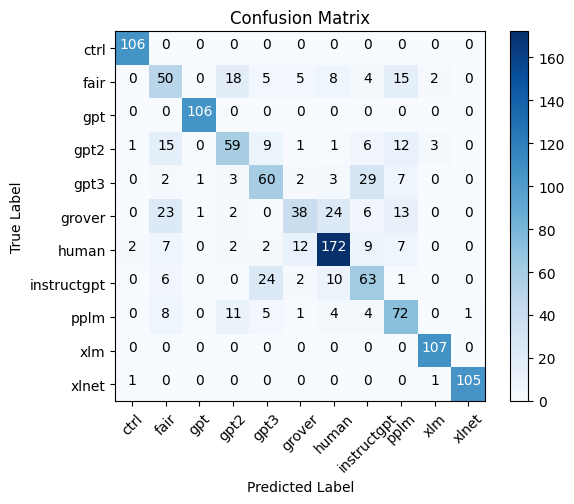

----------------------Random Forest---------------------------
              precision    recall  f1-score   support

        ctrl       0.98      1.00      0.99       104
        fair       0.56      0.45      0.50       132
         gpt       1.00      0.99      1.00       107
        gpt2       0.64      0.71      0.67        96
        gpt3       0.57      0.55      0.56       110
      grover       0.51      0.62      0.56        88
       human       1.00      0.92      0.96       232
 instructgpt       0.52      0.50      0.51       110
        pplm       0.56      0.71      0.62        83
         xlm       1.00      0.96      0.98       111
       xlnet       0.99      1.00      1.00       106

    accuracy                           0.78      1279
   macro avg       0.76      0.77      0.76      1279
weighted avg       0.78      0.78      0.78      1279



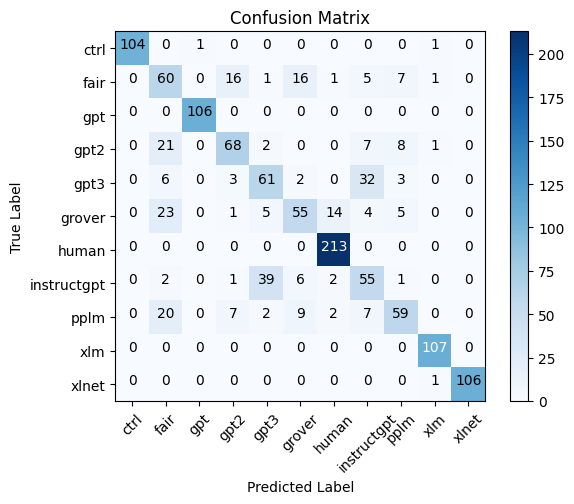

----------------------XGBOOST---------------------------
              precision    recall  f1-score   support

        ctrl       0.99      1.00      1.00       105
        fair       0.57      0.54      0.55       114
         gpt       1.00      0.99      1.00       107
        gpt2       0.67      0.77      0.72        94
        gpt3       0.51      0.56      0.54        98
      grover       0.64      0.74      0.68        92
       human       0.96      0.91      0.93       226
 instructgpt       0.58      0.48      0.53       128
        pplm       0.71      0.74      0.72       101
         xlm       1.00      0.97      0.99       110
       xlnet       0.97      1.00      0.99       104

    accuracy                           0.80      1279
   macro avg       0.78      0.79      0.79      1279
weighted avg       0.80      0.80      0.80      1279



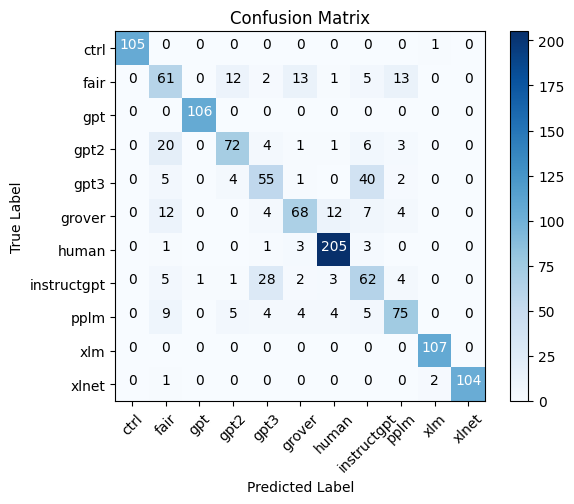

In [ ]:
test_features_generation = get_features_test(test_df, vectorizer=vectorizer_generation)

print("----------------------Linear SVC---------------------------")
y_pred, y_true = test_model(lsvc_generation, test_features_generation, test_df["alg"], id2labels)
return_cm(y_true, y_pred)

print("----------------------Random Forest---------------------------")
y_pred, y_true = test_model(rf_generation, test_features_generation, test_df["alg"], id2labels)
return_cm(y_true, y_pred)

print("----------------------XGBOOST---------------------------")
y_pred, y_true = test_model(xgb_generation, test_features_generation, test_df["alg"], id2labels)
return_cm(y_true, y_pred)

----------------------Linear SVC---------------------------
              precision    recall  f1-score   support

        ctrl       0.00      0.00      0.00        19
        fair       0.00      0.00      0.00        83
         gpt       0.00      0.00      0.00       155
        gpt2       0.00      0.00      0.00        28
        gpt3       0.55      0.62      0.58       788
      grover       0.00      0.00      0.00        74
       human       0.15      0.61      0.24       213
 instructgpt       0.61      0.48      0.54      1114
        pplm       0.00      0.00      0.00       101
         xlm       0.00      0.00      0.00        44
       xlnet       0.00      0.00      0.00        25

    accuracy                           0.44      2644
   macro avg       0.12      0.16      0.12      2644
weighted avg       0.43      0.44      0.42      2644



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


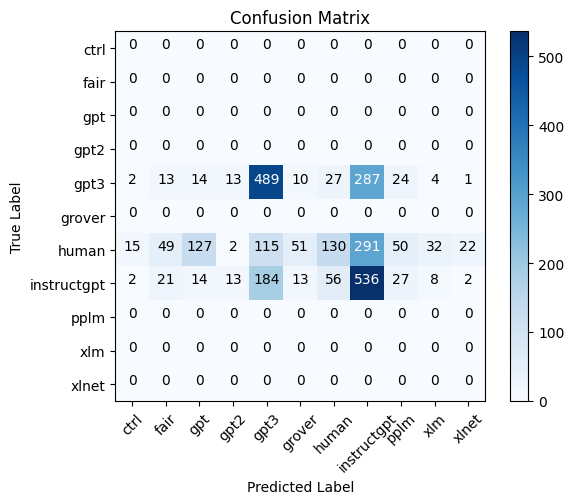

----------------------Random Forest---------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

        ctrl       0.00      0.00      0.00         2
        fair       0.00      0.00      0.00        75
         gpt       0.00      0.00      0.00        34
        gpt2       0.00      0.00      0.00        90
        gpt3       0.63      0.60      0.62       927
      grover       0.00      0.00      0.00       234
       human       0.05      0.71      0.09        59
 instructgpt       0.63      0.47      0.53      1173
        pplm       0.00      0.00      0.00        21
         xlm       0.00      0.00      0.00        29

    accuracy                           0.43      2644
   macro avg       0.13      0.18      0.12      2644
weighted avg       0.50      0.43      0.45      2644



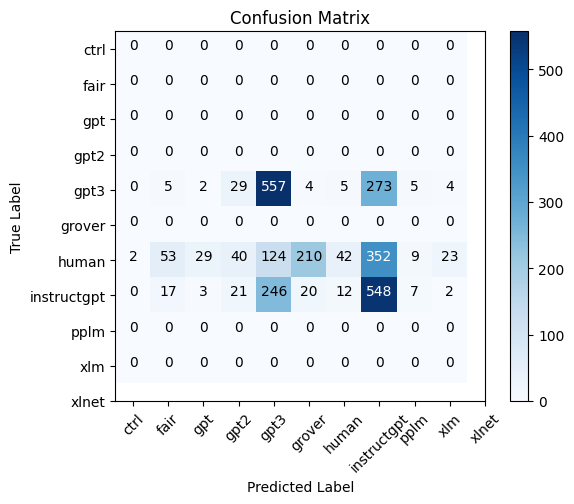

----------------------XGBOOST---------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

        fair       0.00      0.00      0.00        72
         gpt       0.00      0.00      0.00         2
        gpt2       0.00      0.00      0.00        60
        gpt3       0.59      0.64      0.62       816
      grover       0.00      0.00      0.00       184
       human       0.11      0.61      0.19       161
 instructgpt       0.67      0.47      0.55      1252
        pplm       0.00      0.00      0.00        84
         xlm       0.00      0.00      0.00        13

    accuracy                           0.46      2644
   macro avg       0.15      0.19      0.15      2644
weighted avg       0.51      0.46      0.46      2644



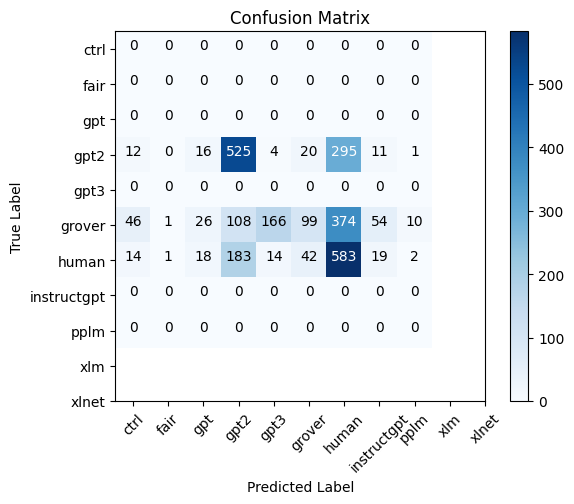

In [ ]:
test_features_generation = get_features_test(reddit_df, vectorizer=vectorizer_generation)

print("----------------------Linear SVC---------------------------")
y_pred, y_true = test_model(lsvc_generation, test_features_generation, reddit_df["alg"], id2labels)
return_cm(y_true, y_pred)

print("----------------------Random Forest---------------------------")
y_pred, y_true = test_model(rf_generation, test_features_generation, reddit_df["alg"], id2labels)
return_cm(y_true, y_pred)

print("----------------------XGBOOST---------------------------")
y_pred, y_true = test_model(xgb_generation, test_features_generation, reddit_df["alg"], id2labels)
return_cm(y_true, y_pred)

In [ ]:
# same way for reddit dataset

## **POS SEQUENCE**

----------------------Linear SVC---------------------------
              precision    recall  f1-score   support

        ctrl       0.99      1.00      1.00       105
        fair       0.60      0.71      0.65        90
         gpt       1.00      0.97      0.99       109
        gpt2       0.68      0.75      0.72        97
        gpt3       0.64      0.67      0.65       101
      grover       0.58      0.62      0.60       100
       human       0.79      0.70      0.74       239
 instructgpt       0.63      0.62      0.63       108
        pplm       0.90      0.81      0.85       118
         xlm       0.98      0.98      0.98       107
       xlnet       0.97      0.99      0.98       105

    accuracy                           0.80      1279
   macro avg       0.80      0.80      0.80      1279
weighted avg       0.80      0.80      0.80      1279



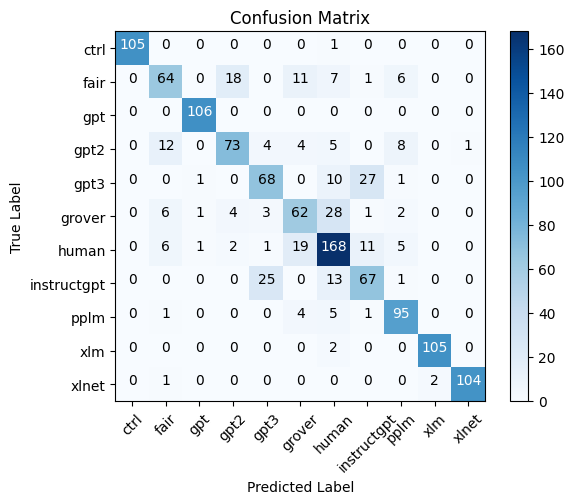

----------------------Random Forest---------------------------
              precision    recall  f1-score   support

        ctrl       1.00      0.99      1.00       107
        fair       0.81      0.64      0.72       136
         gpt       1.00      0.99      1.00       107
        gpt2       0.75      0.86      0.80        93
        gpt3       0.70      0.68      0.69       110
      grover       0.78      0.81      0.79       103
       human       0.85      0.91      0.88       199
 instructgpt       0.63      0.66      0.64       102
        pplm       1.00      0.98      0.99       108
         xlm       1.00      0.99      1.00       108
       xlnet       0.99      1.00      1.00       106

    accuracy                           0.86      1279
   macro avg       0.86      0.86      0.86      1279
weighted avg       0.87      0.86      0.86      1279



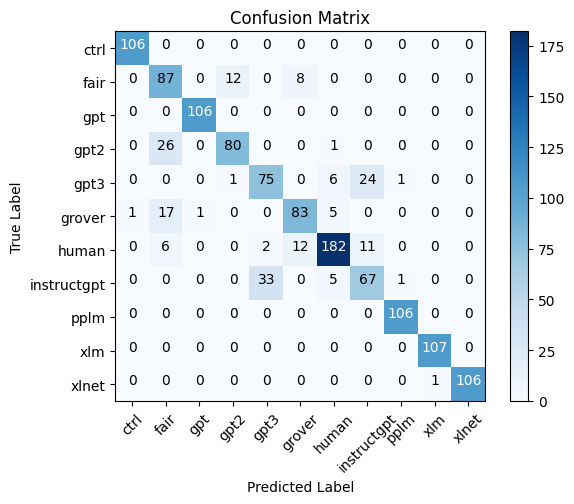

----------------------XGBOOST---------------------------
              precision    recall  f1-score   support

        ctrl       0.98      0.99      0.99       105
        fair       0.85      0.69      0.76       131
         gpt       1.00      0.99      1.00       107
        gpt2       0.81      0.92      0.86        95
        gpt3       0.69      0.69      0.69       107
      grover       0.79      0.82      0.81       104
       human       0.88      0.91      0.90       207
 instructgpt       0.65      0.68      0.67       101
        pplm       1.00      0.98      0.99       108
         xlm       1.00      0.99      1.00       108
       xlnet       0.99      1.00      1.00       106

    accuracy                           0.88      1279
   macro avg       0.88      0.88      0.88      1279
weighted avg       0.88      0.88      0.88      1279



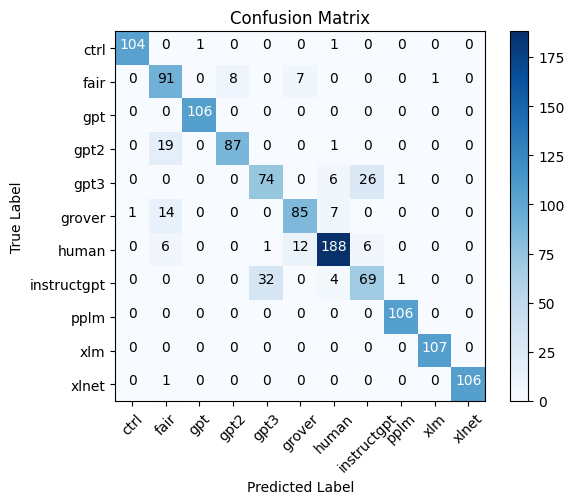

In [ ]:
test_features_pos = get_features_test(test_df, vectorizer=vectorizer_pos)

print("----------------------Linear SVC---------------------------")
y_pred, y_true = test_model(lsvc_pos, test_features_pos, test_df["alg"], id2labels)
return_cm(y_true, y_pred)

print("----------------------Random Forest---------------------------")
y_pred, y_true = test_model(rf_pos, test_features_pos, test_df["alg"], id2labels)
return_cm(y_true, y_pred)

print("----------------------XGBOOST---------------------------")
y_pred, y_true = test_model(xgb_pos, test_features_pos, test_df["alg"], id2labels)
return_cm(y_true, y_pred)

In [ ]:
# same for reddit data set

----------------------Linear SVC---------------------------
              precision    recall  f1-score   support

        ctrl       0.00      0.00      0.00         4
        fair       0.00      0.00      0.00        10
         gpt       0.00      0.00      0.00        83
        gpt3       0.60      0.61      0.60       862
      grover       0.00      0.00      0.00        21
       human       0.28      0.77      0.41       315
 instructgpt       0.65      0.44      0.53      1294
        pplm       0.00      0.00      0.00        11
       xlnet       0.00      0.00      0.00        44

    accuracy                           0.51      2644
   macro avg       0.17      0.20      0.17      2644
weighted avg       0.55      0.51      0.50      2644



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


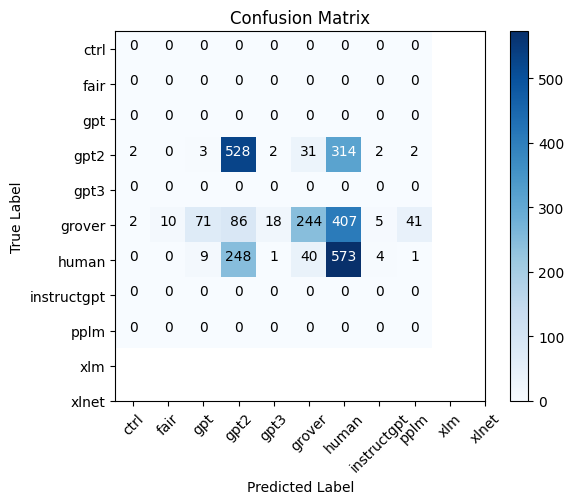

----------------------Random Forest---------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

        fair       0.00      0.00      0.00         8
         gpt       0.00      0.00      0.00        17
        gpt2       0.00      0.00      0.00        24
        gpt3       0.79      0.48      0.60      1455
      grover       0.00      0.00      0.00         3
       human       0.29      0.97      0.45       265
 instructgpt       0.51      0.52      0.51       859
        pplm       0.00      0.00      0.00         6
       xlnet       0.00      0.00      0.00         7

    accuracy                           0.53      2644
   macro avg       0.18      0.22      0.17      2644
weighted avg       0.63      0.53      0.54      2644



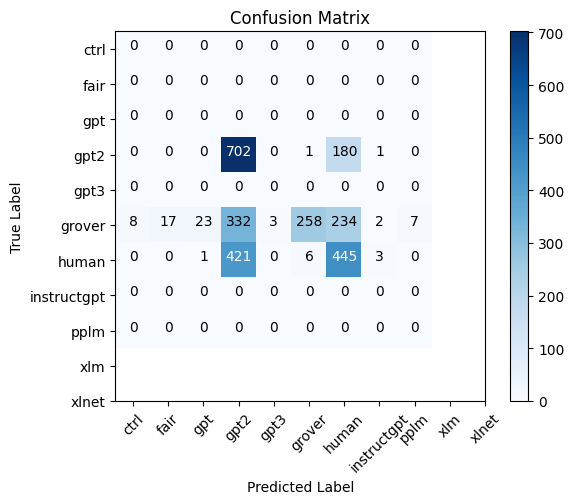

----------------------XGBOOST---------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

        ctrl       0.00      0.00      0.00         1
        fair       0.00      0.00      0.00        15
         gpt       0.00      0.00      0.00        20
        gpt2       0.00      0.00      0.00        13
        gpt3       0.72      0.54      0.62      1189
      grover       0.00      0.00      0.00        23
       human       0.24      0.93      0.38       225
 instructgpt       0.61      0.47      0.54      1134
        pplm       0.00      0.00      0.00        24

    accuracy                           0.52      2644
   macro avg       0.18      0.22      0.17      2644
weighted avg       0.61      0.52      0.54      2644



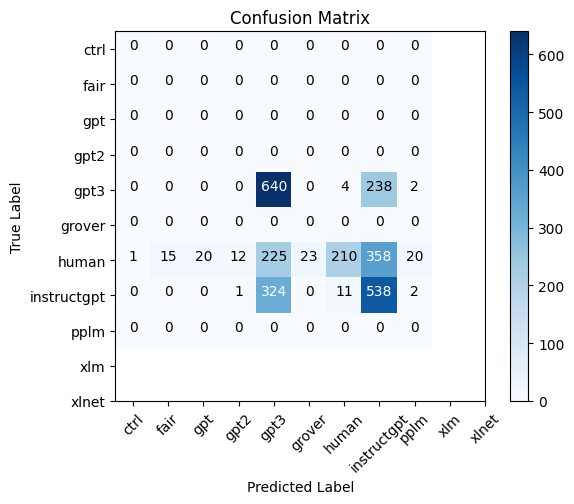

In [ ]:
test_features_pos = get_features_test(reddit_df, vectorizer=vectorizer_pos)

print("----------------------Linear SVC---------------------------")
y_pred, y_true = test_model(lsvc_pos, test_features_pos, reddit_df["alg"], id2labels)
return_cm(y_true, y_pred)

print("----------------------Random Forest---------------------------")
y_pred, y_true = test_model(rf_pos, test_features_pos, reddit_df["alg"], id2labels)
return_cm(y_true, y_pred)

print("----------------------XGBOOST---------------------------")
y_pred, y_true = test_model(xgb_pos, test_features_pos, reddit_df["alg"], id2labels)
return_cm(y_true, y_pred)

# POS DEP AND LIWC

----------------------Linear SVC---------------------------
              precision    recall  f1-score   support

        ctrl       1.00      0.99      1.00       107
        fair       0.69      0.64      0.66       116
         gpt       1.00      0.98      0.99       108
        gpt2       0.57      0.75      0.65        81
        gpt3       0.55      0.64      0.59        92
      grover       0.64      0.66      0.65       103
       human       0.82      0.80      0.81       220
 instructgpt       0.67      0.57      0.61       125
        pplm       0.92      0.85      0.89       115
         xlm       1.00      1.00      1.00       107
       xlnet       0.97      0.99      0.98       105

    accuracy                           0.80      1279
   macro avg       0.80      0.81      0.80      1279
weighted avg       0.81      0.80      0.81      1279



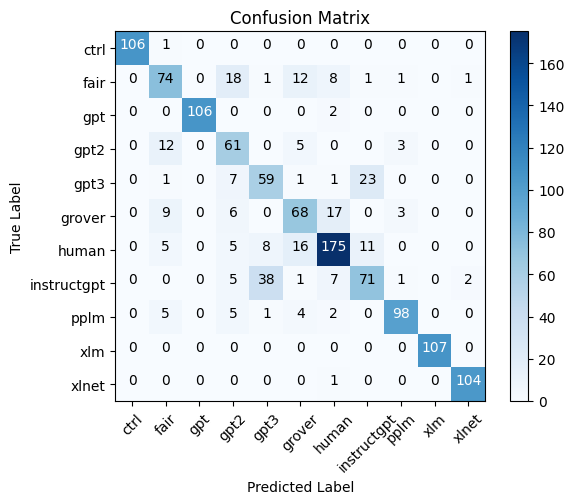

----------------------Random Forest---------------------------
              precision    recall  f1-score   support

        ctrl       1.00      1.00      1.00       106
        fair       0.78      0.64      0.70       129
         gpt       1.00      0.97      0.99       109
        gpt2       0.75      0.85      0.80        94
        gpt3       0.73      0.68      0.71       114
      grover       0.75      0.76      0.75       105
       human       0.85      0.90      0.88       202
 instructgpt       0.61      0.66      0.63        99
        pplm       1.00      0.99      1.00       107
         xlm       1.00      0.98      0.99       109
       xlnet       0.98      1.00      0.99       105

    accuracy                           0.86      1279
   macro avg       0.86      0.86      0.86      1279
weighted avg       0.86      0.86      0.86      1279



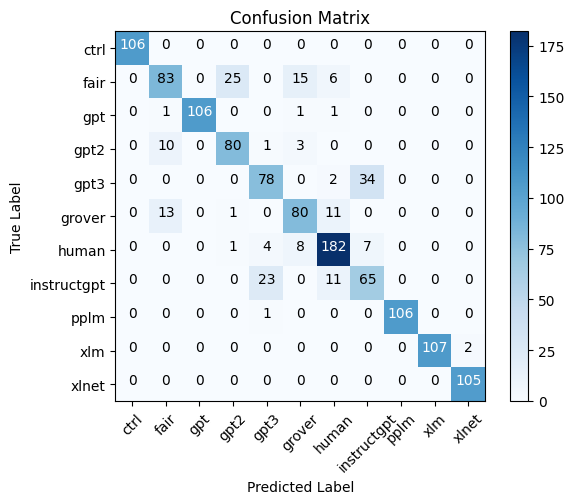

----------------------XGBOOST---------------------------
              precision    recall  f1-score   support

        ctrl       1.00      0.99      1.00       107
        fair       0.88      0.77      0.82       122
         gpt       1.00      1.00      1.00       106
        gpt2       0.84      0.92      0.88        98
        gpt3       0.70      0.82      0.75        92
      grover       0.86      0.88      0.87       104
       human       0.91      0.93      0.92       209
 instructgpt       0.81      0.73      0.77       118
        pplm       1.00      0.98      0.99       108
         xlm       1.00      0.99      1.00       108
       xlnet       1.00      1.00      1.00       107

    accuracy                           0.91      1279
   macro avg       0.91      0.91      0.91      1279
weighted avg       0.91      0.91      0.91      1279



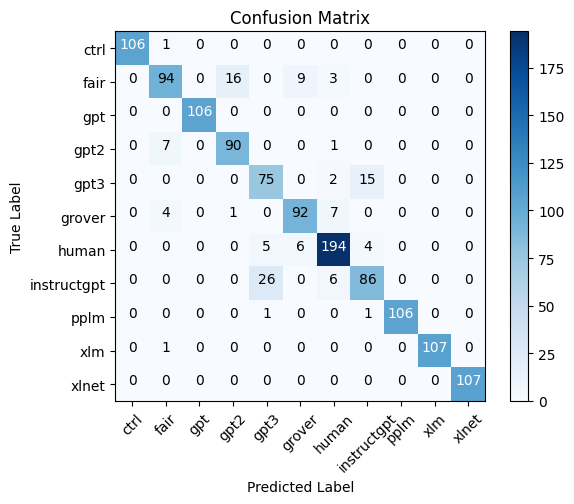

In [ ]:
test_features_pos_dep_liwc = get_features_test(test_df, vectorizer=vectorizer_pos_dep_liwc, numerical_fields=["semantic_coherence", "Analytic", "WPS", "article", "Period"])

print("----------------------Linear SVC---------------------------")
y_true, y_pred = test_model(lsvc_pos_dep_liwc, test_features_pos_dep_liwc, test_df["alg"], id2labels)
return_cm(y_true, y_pred)

print("----------------------Random Forest---------------------------")
y_true, y_pred = test_model(rf_pos_dep_liwc, test_features_pos_dep_liwc, test_df["alg"], id2labels)
return_cm(y_true, y_pred)

print("----------------------XGBOOST---------------------------")
y_true, y_pred = test_model(xgb_pos_dep_liwc, test_features_pos_dep_liwc, test_df["alg"], id2labels)
return_cm(y_true, y_pred)

----------------------Linear SVC---------------------------
              precision    recall  f1-score   support

        ctrl       0.00      0.00      0.00        17
        fair       0.00      0.00      0.00        34
         gpt       0.00      0.00      0.00        80
        gpt2       0.00      0.00      0.00         5
        gpt3       0.57      0.62      0.59       810
      grover       0.00      0.00      0.00        76
       human       0.28      0.75      0.41       336
 instructgpt       0.64      0.47      0.54      1192
        pplm       0.00      0.00      0.00        20
         xlm       0.00      0.00      0.00         1
       xlnet       0.00      0.00      0.00        73

    accuracy                           0.50      2644
   macro avg       0.14      0.17      0.14      2644
weighted avg       0.50      0.50      0.48      2644



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


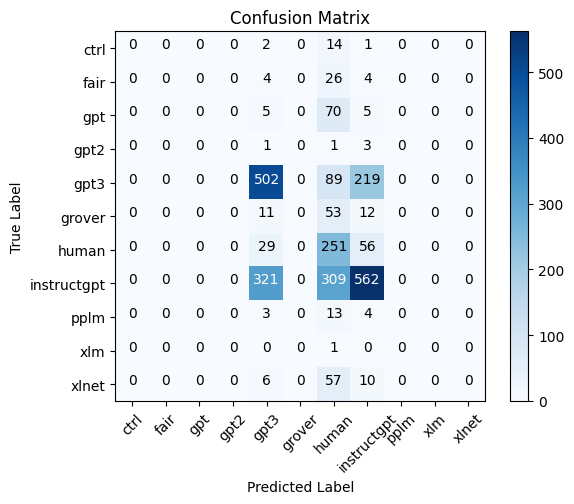

----------------------Random Forest---------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

        fair       0.00      0.00      0.00         2
         gpt       0.00      0.00      0.00        23
        gpt2       0.00      0.00      0.00        31
        gpt3       0.80      0.49      0.61      1433
      grover       0.00      0.00      0.00         6
       human       0.31      0.99      0.47       279
 instructgpt       0.52      0.53      0.52       858
        pplm       0.00      0.00      0.00         4
       xlnet       0.00      0.00      0.00         8

    accuracy                           0.54      2644
   macro avg       0.18      0.22      0.18      2644
weighted avg       0.64      0.54      0.55      2644



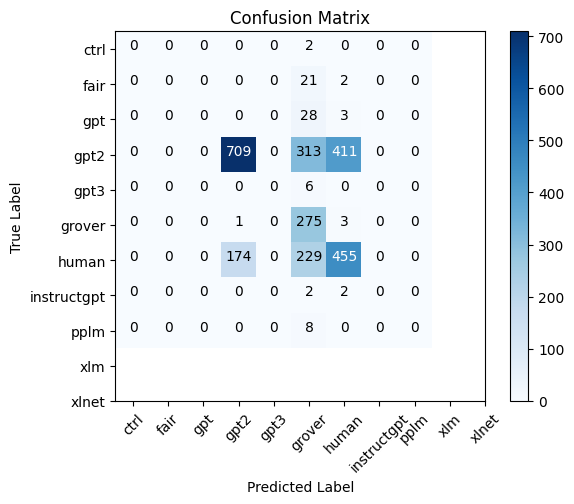

----------------------XGBOOST---------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

        ctrl       0.00      0.00      0.00         2
        fair       0.00      0.00      0.00         6
         gpt       0.00      0.00      0.00        10
        gpt2       0.00      0.00      0.00        29
        gpt3       0.77      0.56      0.65      1204
      grover       0.00      0.00      0.00        25
       human       0.24      0.97      0.38       217
 instructgpt       0.63      0.49      0.55      1119
        pplm       0.00      0.00      0.00        24
       xlnet       0.00      0.00      0.00         8

    accuracy                           0.54      2644
   macro avg       0.16      0.20      0.16      2644
weighted avg       0.64      0.54      0.56      2644



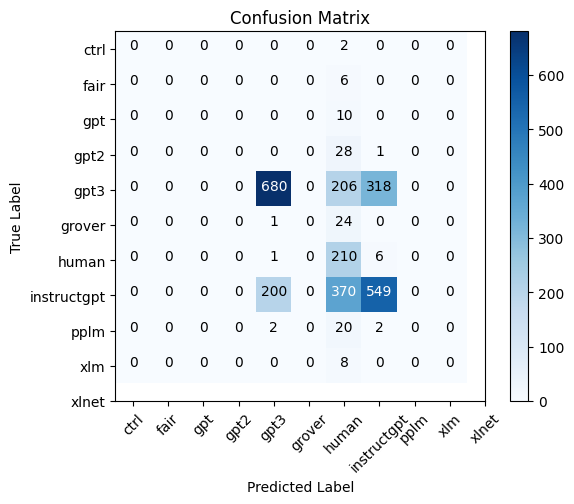

In [ ]:
test_features_pos_dep_liwc = get_features_test(reddit_df, vectorizer=vectorizer_pos_dep_liwc, numerical_fields=["semantic_coherence", "Analytic", "WPS", "article", "Period"])

print("----------------------Linear SVC---------------------------")
y_true, y_pred = test_model(lsvc_pos_dep_liwc, test_features_pos_dep_liwc, reddit_df["alg"], id2labels)
return_cm(y_true, y_pred)

print("----------------------Random Forest---------------------------")
y_true, y_pred = test_model(rf_pos_dep_liwc, test_features_pos_dep_liwc, reddit_df["alg"], id2labels)
return_cm(y_true, y_pred)

print("----------------------XGBOOST---------------------------")
y_true, y_pred = test_model(xgb_pos_dep_liwc, test_features_pos_dep_liwc, reddit_df["alg"], id2labels)
return_cm(y_true, y_pred)

In [ ]:
#login in the server go to /home/spc/Downloads/NLP/pyenv_local/NLP/src
# start ipython
# run below commands, bert_tfidf is my file

# POS DEP LIWC ROBERTA

from bert_tfidf import *
import pandas as pd
train_df = pd.read_csv('../data/liwc_pos_dep_tr.csv')
test_df = pd.read_csv('../data/liwc_pos_dep_eval.csv')
reddit_df = pd.read_csv('../data/liwc_pos_dep_reddit.csv')

labels2id = {l: i for i, l in enumerate(train_df['alg'].unique())}
model = torch.load("models/roberta_base_pos_dep_liwc/checkpoint_epoch=4-val_loss=0.16928044552332722.ckpt")
vectorizer = joblib.load("models/roberta_base_pos_dep_liwc/vectorizer.pkl")
test_dataloader, reddit_dataloader = data_batcher_evaluate(test_df, reddit_df, vectorizer, labels2id, numerical_fields=["semantic_coherence", "Analytic", "WPS", "article", "Period"], batch_size=32, model_name="roberta-base")

# For AA PAPER
evaluate_test(model, test_dataloader, labels2id, test_df["alg"])

# For Reddit
evaluate_test(model, reddit_dataloader, labels2id, reddit_df["alg"])













# POS ROBERTA
from bert_tfidf import *
import pandas as pd
train_df = pd.read_csv('../data/liwc_pos_dep_tr.csv')
test_df = pd.read_csv('../data/liwc_pos_dep_eval.csv')
reddit_df = pd.read_csv('../data/liwc_pos_dep_reddit.csv')

labels2id = {l: i for i, l in enumerate(train_df['alg'].unique())}
vectorizer = joblib.load("models/roberta_base_pos/vectorizer.pkl")
test_dataloader, reddit_dataloader = data_batcher_evaluate(test_df, reddit_df, vectorizer, labels2id, batch_size=32, model_name="roberta-base")
model = torch.load("models/roberta_base_pos/checkpoint_epoch=3-val_loss=0.17280692871039113.ckpt")

# For AA PAPER
pred, true_label = evaluate_test(model, test_dataloader, labels2id, test_df["alg"])

# For Reddit
pred_reddit, true_label_reddit = evaluate_test(model, reddit_dataloader, labels2id, reddit_df["alg"])









# POS Dependency Tfidf +  ROBERTA
from bert_tfidf import *
import pandas as pd
train_df = pd.read_csv('../data/liwc_pos_dep_tr.csv')
test_df = pd.read_csv('../data/liwc_pos_dep_eval.csv')
reddit_df = pd.read_csv('../data/liwc_pos_dep_reddit.csv')

labels2id = {l: i for i, l in enumerate(train_df['alg'].unique())}
vectorizer = joblib.load("models/roberta_base_pos_dep/vectorizer.pkl")
test_dataloader, reddit_dataloader = data_batcher_evaluate(test_df, reddit_df, vectorizer, labels2id, batch_size=32, model_name="roberta-base")
model = torch.load("models/roberta_base_pos_dep/checkpoint_epoch=2-val_loss=0.21201472314229855.ckpt")

# For AA PAPER
pred, true_label = evaluate_test(model, test_dataloader, labels2id, test_df["alg"])

# For Reddit
pred_reddit, true_label_reddit = evaluate_test(model, reddit_dataloader, labels2id, reddit_df["alg"])

